# Simulating Language 5, Simple Innate Signalling (lab) ANSWERS

The code below builds up to a function, ```ca_monte```, which measures and returns the level of communicative accuracy between a production system and a reception system. Signalling systems are stored as lists of lists of association weights. This list of lists structure can be thought of as a matrix with meanings on the rows and signals on the columns (for production matrices) or signals on the rows and meanings on the columns (for reception matrices).

You should go through this notebook cell by cell, running each cell by using SHIFT+ENTER.

First, we import the random library and the usual plotting stuff.

In [45]:
import random

%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')

Now here's the bulk of the code, in three functions, ```wta``` (for "winner take all"), ```communicate```, and ```ca_monte```.

In [46]:
def wta(items):
    maxweight = max(items)
    candidates = []
    for i in range(len(items)):
        if items[i] == maxweight:
            candidates.append(i)
    return random.choice(candidates)

def communicate(speaker_system, hearer_system, meaning):
    speaker_signal = wta(speaker_system[meaning])
    hearer_meaning = wta(hearer_system[speaker_signal])
    if meaning == hearer_meaning:
        return 1
    else:
        return 0

def ca_monte(speaker_system, hearer_system, trials):
    total = 0.
    accumulator = []
    for n in range(trials):
        total += communicate(speaker_system, hearer_system, 
                            random.randrange(len(speaker_system)))
        accumulator.append(total / (n + 1))
    return accumulator

We'll try and understand what this code does and why in a minute, but for now let's try getting it to do something. Let's say we had three meanings, and three signals. Let's imagine a speaker who used signal 0 for meaning 0, signal 1 for meaning 1, and both signal 1 and 2 for meaning 2, and a hearer who understood meaning 0 for signal 0, meaning 1 or 2 for signal 1, and meaning 2 for signal 2. What do we expect the communicative accuracy to be for these two individuals?

Try and figure this out in your head first (it might help to write out the matrices on a piece of paper).

Now, let's simulate it! Enter the following code in the next cell (note I've formatted the list of lists nicely so you can read them as matrices, but these can also be entered all on one line if you want):

```python
speaker = [[1, 0, 0],
           [0, 1, 0],
           [0, 1, 1]]

hearer = [[1, 0, 0],
          [0, 1, 1],
          [0, 0, 1]]

ca_monte(speaker, hearer, 100)
```

This simulates 100 interactions between the speaker and hearer and returns a list consisting of the average communicative accuracy so far at each interaction (so the values in this list become more and more accurate reflections of the communicative accuracy as you go through the list).

In [47]:
speaker = [[1, 0, 0],
           [0, 1, 0],
           [0, 1, 1]]

hearer = [[1, 0, 0],
          [0, 1, 1],
          [0, 0, 1]]

ca_monte(speaker, hearer, 100)


[1.0,
 1.0,
 1.0,
 0.75,
 0.8,
 0.8333333333333334,
 0.8571428571428571,
 0.875,
 0.8888888888888888,
 0.8,
 0.8181818181818182,
 0.8333333333333334,
 0.8461538461538461,
 0.8571428571428571,
 0.8666666666666667,
 0.8125,
 0.8235294117647058,
 0.8333333333333334,
 0.8421052631578947,
 0.85,
 0.8571428571428571,
 0.8636363636363636,
 0.8695652173913043,
 0.875,
 0.84,
 0.8461538461538461,
 0.8518518518518519,
 0.8571428571428571,
 0.8620689655172413,
 0.8666666666666667,
 0.8387096774193549,
 0.84375,
 0.8484848484848485,
 0.8529411764705882,
 0.8571428571428571,
 0.8611111111111112,
 0.8648648648648649,
 0.8421052631578947,
 0.8205128205128205,
 0.8,
 0.7804878048780488,
 0.7857142857142857,
 0.7906976744186046,
 0.7954545454545454,
 0.8,
 0.8043478260869565,
 0.8085106382978723,
 0.8125,
 0.8163265306122449,
 0.8,
 0.803921568627451,
 0.8076923076923077,
 0.7924528301886793,
 0.7962962962962963,
 0.8,
 0.8035714285714286,
 0.8070175438596491,
 0.8103448275862069,
 0.8135593220338984,


So, this has given us our first simulation results! We can look at these as a big list, but it might be better to plot it as a graph. Try the following, for example:

```python
data = ca_monte(speaker, hearer, 100)
plt.plot(data)
plt.xlabel('trials')
plt.ylabel('communicative accuracy')
plt.ylim([0,1])
plt.grid()
```

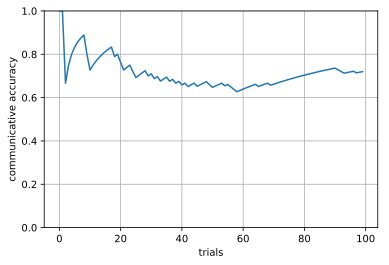

In [48]:
data = ca_monte(speaker, hearer, 100)
plt.plot(data)
plt.xlabel('trials')
plt.ylabel('communicative accuracy')
plt.ylim([0,1])
plt.grid()

So, this plots a single simulation run on a graph. More often, we want to plot lots of runs on a graph. We can do this by making a loop, and gathering a lot of simulation runs in a list. (This will actually be a list of lists now...)

For example, we could do the following to get ten simulation runs:

```python
lots_of_data = []
for n in range(10):
    data = ca_monte(speaker, hearer, 100)
    lots_of_data.append(data)

print(lots_of_data)
```

In [49]:
lots_of_data = []
for n in range(10):
    data = ca_monte(speaker, hearer, 100)
    lots_of_data.append(data)

print(lots_of_data)

[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 0.8, 0.8181818181818182, 0.8333333333333334, 0.8461538461538461, 0.8571428571428571, 0.8666666666666667, 0.875, 0.8235294117647058, 0.7777777777777778, 0.7894736842105263, 0.8, 0.8095238095238095, 0.8181818181818182, 0.782608695652174, 0.7916666666666666, 0.8, 0.8076923076923077, 0.8148148148148148, 0.8214285714285714, 0.8275862068965517, 0.8, 0.7741935483870968, 0.78125, 0.7878787878787878, 0.7941176470588235, 0.8, 0.7777777777777778, 0.7837837837837838, 0.7894736842105263, 0.7948717948717948, 0.8, 0.8048780487804879, 0.8095238095238095, 0.7906976744186046, 0.7727272727272727, 0.7777777777777778, 0.7608695652173914, 0.7659574468085106, 0.7708333333333334, 0.7755102040816326, 0.78, 0.7843137254901961, 0.7884615384615384, 0.7924528301886793, 0.7962962962962963, 0.7818181818181819, 0.7857142857142857, 0.7894736842105263, 0.7758620689655172, 0.7796610169491526, 0.7833333333333333, 0.7868852459016393, 0.7741935483870968, 0.77777

Hmmm... I'm not sure we want to spend much time looking at screens full of numbers! Let's plot a graph!

The following command produces a nicer visualisation of our data, showing all the graphs with transparent lines so we can see the aggregate behaviour of multiple simulations. See if you can figure out how this bit of code works. _Hint: in graphics "alpha" is a technical term for transparency._

```python
for data in lots_of_data:
    plt.plot(data, color='orange', alpha=0.5)
plt.xlabel('trials')
plt.ylabel('communicative accuracy')
plt.ylim([0,1])
plt.grid()
```

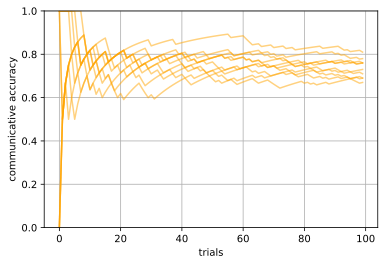

In [50]:
for data in lots_of_data:
    plt.plot(data, color='orange', alpha=0.5)
plt.xlabel('trials')
plt.ylabel('communicative accuracy')
plt.ylim([0,1])
plt.grid()

Another useful type of plot is a histogram showing a distribution of values. Let's say we wanted to know what the end result of a lot of simulation runs looked like. We need to do a little bit of work to pull out the last item of each run of a simulation and put it in a list. This code will do that:

```python
end_result = []
for n in range(10):
    data = ca_monte(speaker, hearer, 100)
    last_item = data[len(data) - 1]
    end_result.append(last_item)
```

Now we can plot the distribution using another handy plotting command, `hist`:

```python
plt.hist(end_result)
plt.xlabel('communicative accuracy')
plt.xlim([0, 1])    
```


In [51]:
end_result = []
for n in range(10):
    data = ca_monte(speaker, hearer, 100)
    last_item = data[len(data) - 1]
    end_result.append(last_item)

(0, 1)

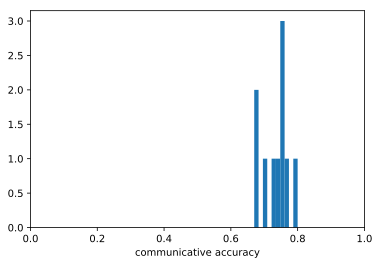

In [52]:
plt.hist(end_result)
plt.xlabel('communicative accuracy')
plt.xlim([0, 1])    


OK, now we've had a bit of fun, let's understand what's going on!

Try and understand what each function does. Look at the main function `ca_monte` first, then the function it calls (`communicate`), and so on until you have inspected each function separately. Can you see why the program has been divided into functions in the way it has? 

If you're not sure what each function does, you can have a look at the separate (very!) detailed walkthrough notebook I've provided on the Learn page. Work through that first and then come back here.

When you are satisfied that you understand roughly how the code works, answer the following questions. 1-3 should be completed by everyone. **4 and 5 are optional!** Only attempt them if you are happy you have completed 1-3.

1. How many trials should there be in the Monte Carlo simulation to work out communicative accuracy? *Hint: answer this question empirically by plotting the results and comparing to what the "real" answer should be for various numbers of trials.*

In [53]:
end_results = []

for trials in [10, 100, 1000, 10000]:
    end_result = []
    for n in range(50):
        data = ca_monte(speaker, hearer, trials)
        last_item = data[len(data) - 1]
        end_result.append(last_item)
    end_results.append(end_result)

Text(0.5,0,'communicative accuracy')

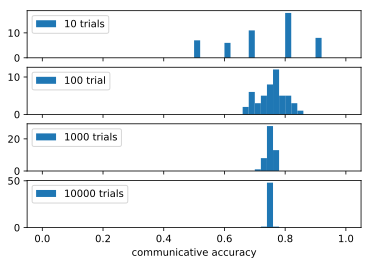

In [54]:
fig, axs = plt.subplots(nrows=4, ncols=1, sharex=True)
for i in range(4):
    axs[i].hist(end_results[i], range=(0,1), bins=50, 
            label=['10 trials', '100 trial', '1000 trials', '10000 trials'][i])
    axs[i].legend()

axs[3].set_xlabel('communicative accuracy')

2. How do synonymy and homonymy affect communicative accuracy? Create production and reception systems with different degrees of homonymy and synonymy to explore this. *Note: you don’t have to start from the production and reception systems given above, and you don’t have to restrict yourself to systems with 3 meanings and 3 signals.*

3. What alternatives to "winner-take-all" might there be in the model of production/ reception? What difference might this make? Would they be more or less realistic, or powerful as a model? *Hint: how might you interpret weights as probabilities?*

4. **[optional]** How could you model production and reception using a single underlying matrix, rather than separate production and reception matrices? Is this kind of model better or worse than a model where we use separate matrices?

5. **[optional]** How would you go about calculating communicative accuracy exactly, i.e. rather than via Monte Carlo techniques?